In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\hasna\Desktop\Simran\TE\TE-SEM-2\Practicals\DSBDL\Datasets\StudentPerformance.csv")
print(df)

    math score  reading score  writing score  placement score  \
0           80             68             70               89   
1           71             61             85               91   
2           79             16             87               77   
3           61             77             74               76   
4           78             71             67               90   
5           73             68             90               80   
6           77             62             70               35   
7           74             45             80               12   
8           76             60             79               77   
9           75             65             85               87   
10         160             67             12               83   
11          79             72             88              180   
12          80             80             78               94   
13          78             69             71               90   
14          75           

In [3]:
missingdata=df.isnull()
df.isnull().sum()

math score               0
reading score            0
writing score            0
placement score          0
placement offer count    0
club join year           0
dtype: int64

In [ ]:
new_df=df
col=['Maths_Score']
new_df.boxplot(col)
plt.show()

In [ ]:
q1=np.percentile(df['Maths_Score'],25)
q3=np.percentile(df['Maths_Score'],75)
print(q1,q3)


In [ ]:
# IQR - Inter Quartile Range
IQR=q3-q1
print(IQR)

In [ ]:
lwr_bound=q1-(1.5*IQR)
upr_bound=q3+(1.5*IQR)
print(lwr_bound,upr_bound)
index_outlier=np.where((df[col]<lwr_bound)|(df[col]>upr_bound))
index_outlier

In [ ]:
new_df1 = df
for i in index_outlier:
    new_df1.drop(i, inplace=True)
new_df1

In [ ]:
new_df1

In [1]:
from scipy import stats

In [7]:
z=np.abs(stats.zscore(df['math score']))
print(z)

0     0.175646
1     0.528288
2     0.214828
3     0.920112
4     0.254010
5     0.449923
6     0.293193
7     0.410740
8     0.332375
9     0.371558
10    2.958952
11    0.214828
12    0.175646
13    0.254010
14    0.371558
15    0.254010
16    0.059449
17    0.175646
18    0.371558
19    0.097281
20    0.606653
21    0.608004
22    0.489105
23    0.410740
24    0.371558
25    3.742601
26    0.489105
27    0.528288
28    1.391653
Name: math score, dtype: float64


In [9]:
threshold=0.18
sample_outlier=np.where(z<=threshold)
sample_outlier

(array([ 0, 12, 16, 17, 19], dtype=int64),)

In [11]:
new_df=df #
for i in sample_outlier:
    new_df.drop(i, inplace=True)
new_df

,math score,reading score,writing score,placement score,placement offer count,club join year
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018
10,160,67,12,83,2,2020


In [14]:
df1=pd.read_csv(r"C:\Users\hasna\Desktop\Simran\TE\TE-SEM-2\Practicals\DSBDL\Datasets\StudentPerformance.csv") #flooring & clapping
df_stud=df
print(df)

    math score  reading score  writing score  placement score  \
1           71             61             85               91   
2           79             16             87               77   
3           61             77             74               76   
4           78             71             67               90   
5           73             68             90               80   
6           77             62             70               35   
7           74             45             80               12   
8           76             60             79               77   
9           75             65             85               87   
10         160             67             12               83   
11          79             72             88              180   
13          78             69             71               90   
14          75              1             71               81   
15          78             62             79               93   
18          75           

In [15]:
ninetieth_percentile=np.percentile(df_stud['math score'],90) #calculated ninetieth value of maths score to replace the greater value than ninetieth percentile
b=np.where(df_stud['math score']>ninetieth_percentile,ninetieth_percentile,df_stud['math score'])
print("New arrag:",b)

New arrag: [ 71.  79.  61.  78.  73.  77.  74.  76.  75. 114.  79.  78.  75.  78.
  75.  69. 100.  72.  74.  75. 114.  72.  71. 114.]


In [18]:
df_stud.insert(1,"math score", b,True)
df_stud

,math score,math score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61,85,91,3,2019
2,79,79.0,16,87,77,2,2018
3,61,61.0,77,74,76,2,2020
4,78,78.0,71,67,90,3,2019
5,73,73.0,68,90,80,2,2019
6,77,77.0,62,70,35,2,2020
7,74,74.0,45,80,12,1,2019
8,76,76.0,60,79,77,2,2020
9,75,75.0,65,85,87,3,2018
10,160,114.0,67,12,83,2,2020


In [19]:
import matplotlib.pyplot as plt

<AxesSubplot:>

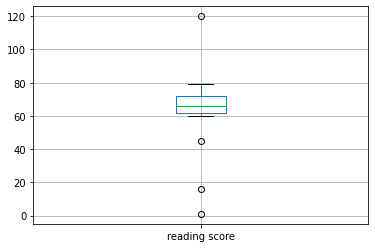

In [20]:
col=['reading score']
df.boxplot(col)

In [23]:
sorted_rscore=sorted(df['reading score']) #sorted function come uner numpy 
print(sorted_rscore)

[1, 16, 45, 60, 60, 61, 62, 62, 62, 65, 65, 65, 67, 67, 68, 69, 71, 72, 73, 77, 77, 77, 79, 120]


In [24]:
median=np.median(sorted_rscore) #calculate median
median

66.0

In [25]:
q1=np.percentile(df['reading score'],25) #calculate IQR
q3=np.percentile(df['reading score'],75)
IQR=q3-q1
print(IQR)

10.5


In [26]:
lwr_bound=q1-(1.5*IQR) #calculate lwr & upr bound
upr_bound=q3+(1.5*IQR)
print(lwr_bound,upr_bound)
inden_outlier=np.where((df[col]<lwr_bound)|(df[col]>upr_bound))
inden_outlier

46.0 88.0


(array([ 1,  6, 12, 21], dtype=int64), array([0, 0, 0, 0], dtype=int64))

In [29]:
refined_df=df #replace the value with median which is greater than upper bound(88)
refined_df['reading score']=np.where(refined_df['reading score']>upr_bound,median,refined_df['reading score'])
refined_df

,math score,math score,reading score,writing score,placement score,placement offer count,club join year
1,71,71.0,61.0,85,91,3,2019
2,79,79.0,16.0,87,77,2,2018
3,61,61.0,77.0,74,76,2,2020
4,78,78.0,71.0,67,90,3,2019
5,73,73.0,68.0,90,80,2,2019
6,77,77.0,62.0,70,35,2,2020
7,74,74.0,45.0,80,12,1,2019
8,76,76.0,60.0,79,77,2,2020
9,75,75.0,65.0,85,87,3,2018
10,160,114.0,67.0,12,83,2,2020


In [ ]:
#Data transformation methods 1:Smoothing 2:Aggregation 3:Generalization 4:Normalization(z-score,min_max)
